<a href="https://www.kaggle.com/code/nilaygaitonde/mnist-from-scratch?scriptVersionId=157118372" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This notebook has been made with inspirations from: <br/>
* [Neural Networks from scratch](https://www.youtube.com/watch?v=w8yWXqWQYmU)
* [Neural Networks Explained from Scratch using Python](https://www.youtube.com/watch?v=9RN2Wr8xvro)
* [Andrew Ng Deep learning course](https://in.coursera.org/learn/neural-networks-deep-learning/home)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_orig=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
data=np.array(train_orig)

In [4]:
m,n=data.shape
# m = no of examples and n is the number of pixels
np.random.shuffle(data)
# splitting the data. 1000 for testing and the rest for training

# test data
test_data=data[0:1000].T
X_test=test_data[1:n]
X_test=X_test/255.
Y_test=test_data[0]

# training data
train_data=data[1000:m].T
X_train=train_data[1:n]
X_train=X_train/255.
Y_train=train_data[0]
_,m_train=X_train.shape

In [5]:
def init_nn():
    W1=np.random.randn(10,784)*0.01
    W2=np.random.randn(10,10)*0.01
    B1=np.random.uniform(-0.5,0.5,(10,1))
    B2=np.random.uniform(-0.5,0.5,(10,1))
    return W1,W2,B1,B2

In [6]:
# FORWARD PROPOGATION

# activation function 1 tanh
def tanh(z):
    return np.tanh(z)

# activation function 2 softmax
def softmax(z):
    return (np.exp(z)/sum(np.exp(z)))

def forward_propogation(W1,W2,b1,b2,X):
    z1=W1.dot(X)+b1
    a1=tanh(z1)
    z2=W2.dot(a1)+b2
    a2=softmax(z2)
    return z1,a1,z2,a2

In [7]:
def one_hot_encoding(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

def tanh_deriv(z):
#     return z>0
    return (1-(tanh(z)**2))

def backward_propogation(Z1,A1,Z2,A2,W2,Y,X):
    m=Y.size
    one_hot_Y=one_hot_encoding(Y)
    dz2=A2-one_hot_Y
    dw2=(1/m)*(dz2.dot(A1.T))
    db2=(1/m)*(np.sum(dz2))
    dz1=W2.T.dot(dz2)*tanh_deriv(Z1)
    dw1=(1/m)*(dz1.dot(X.T))
    db1=(1/m)*(np.sum(dz1))
    return dw1,dw2,db1,db2

def update_params(w1,b1,w2,b2,dw1,dw2,db1,db2,alpha):
    w1=w1-alpha*dw1
    w2=w2-alpha*dw2
    b1=b1-alpha*db1
    b2=b2-alpha*db2
    return w1,w2,b1,b2

In [8]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print('Predictions')
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y,alpha,iterations):
    W1,W2,B1,B2=init_nn()
    for i in range(iterations):
        z1,a1,z2,a2=forward_propogation(W1,W2,B1,B2,X)
        dw1,dw2,db1,db2=backward_propogation(z1,a1,z2,a2,W2,Y,X)
        W1,W2,B1,B2=update_params(W1,B1,W2,B2,dw1,dw2,db1,db2,alpha)
        if(i%10==0):
            print(f"Index no:{i}")
    #             print(f"Current Params:w1{W1},w2{W2},b1{B1},b2{B2}")
            print(f"Accuracy: {get_accuracy(get_predictions(a2),Y)}")
    return W1,W2,B1,B2

In [9]:
W1,W2,B1,B2=gradient_descent(X_train,Y_train,0.10,900)

Index no:0
Predictions
[4 4 4 ... 4 4 4] [4 1 9 ... 7 5 3]
Accuracy: 0.09690243902439025
Index no:10
Predictions
[4 4 4 ... 4 4 4] [4 1 9 ... 7 5 3]
Accuracy: 0.09690243902439025
Index no:20
Predictions
[4 4 4 ... 4 4 4] [4 1 9 ... 7 5 3]
Accuracy: 0.09870731707317074
Index no:30
Predictions
[2 2 2 ... 2 2 2] [4 1 9 ... 7 5 3]
Accuracy: 0.105
Index no:40
Predictions
[2 1 2 ... 2 2 2] [4 1 9 ... 7 5 3]
Accuracy: 0.15939024390243903
Index no:50
Predictions
[2 1 2 ... 2 2 2] [4 1 9 ... 7 5 3]
Accuracy: 0.22997560975609757
Index no:60
Predictions
[4 1 4 ... 2 4 3] [4 1 9 ... 7 5 3]
Accuracy: 0.4128292682926829
Index no:70
Predictions
[4 1 4 ... 2 4 0] [4 1 9 ... 7 5 3]
Accuracy: 0.4358780487804878
Index no:80
Predictions
[4 1 4 ... 5 4 0] [4 1 9 ... 7 5 3]
Accuracy: 0.47860975609756096
Index no:90
Predictions
[4 1 4 ... 0 7 0] [4 1 9 ... 7 5 3]
Accuracy: 0.523390243902439
Index no:100
Predictions
[4 1 4 ... 0 7 3] [4 1 9 ... 7 5 3]
Accuracy: 0.5483902439024391
Index no:110
Predictions
[4 1

500:
Tanh accuracy= 88.29%
relu accuracy= 88.03%

900:
tanh accuracy= 90.57%
relu accuracy= 90.80%

In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propogation(W1, W2,b1, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = X_train[:, index, None]
    print(current_image.shape)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4
(784, 1)


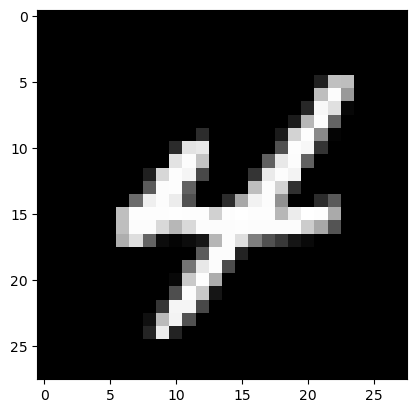

In [11]:
test_prediction(0,W1,B1,W2,B2)

Prediction:  [8]
Label:  8
(784, 1)


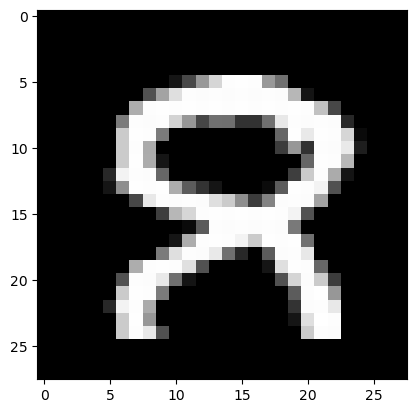

In [12]:
test_prediction(50,W1,B1,W2,B2)

In [13]:
test_predictions=make_predictions(X_test,W1,B1,W2,B2)
get_accuracy(test_predictions,Y_test)*100

Predictions
[3 2 9 2 9 1 0 5 2 8 2 0 3 4 0 2 1 3 3 8 3 1 0 8 2 7 9 0 0 6 9 6 0 6 3 2 1
 1 6 7 0 2 4 9 1 8 8 0 0 5 6 2 7 6 0 3 8 2 0 2 9 8 0 9 5 8 0 4 9 6 8 0 6 0
 1 8 4 0 1 2 1 7 5 8 0 5 4 5 1 3 4 5 7 3 7 2 4 2 1 2 9 5 3 7 2 0 1 7 9 2 9
 0 7 5 4 5 3 1 0 6 1 3 9 0 8 5 3 1 8 2 4 1 1 6 3 7 7 0 8 8 2 0 8 5 4 1 7 6
 6 3 4 0 7 2 7 7 7 1 8 5 7 3 6 2 0 2 1 4 0 6 9 0 0 9 5 8 8 9 4 7 8 8 0 5 4
 4 3 3 3 2 6 4 5 0 8 9 8 8 2 0 4 2 8 4 7 8 7 4 9 7 6 5 6 2 9 3 9 1 7 4 0 7
 3 8 2 6 1 9 7 9 3 7 1 1 3 1 4 4 0 3 7 0 4 7 8 2 7 7 3 0 9 2 9 2 5 8 5 1 7
 8 9 0 8 9 0 7 7 6 3 5 3 0 8 1 6 2 2 5 6 5 6 2 9 4 5 1 1 2 0 0 3 0 6 1 0 4
 6 0 9 5 8 3 4 4 1 3 3 0 3 7 4 0 4 1 9 6 9 8 3 3 9 5 9 8 3 4 6 0 6 1 8 5 4
 9 6 7 2 2 7 4 3 9 0 2 7 6 0 3 3 7 1 7 2 5 6 2 0 1 3 5 1 8 5 2 7 1 5 1 6 2
 8 5 1 3 6 7 7 1 7 3 7 1 9 3 6 1 1 7 5 3 8 6 2 5 4 1 0 0 4 6 1 1 7 4 4 7 3
 9 9 0 5 0 1 3 0 9 0 7 1 4 8 2 8 5 1 8 2 8 4 1 5 3 8 6 3 9 3 6 8 2 5 7 7 0
 3 4 2 8 1 5 5 7 2 1 3 7 4 5 0 0 0 2 0 0 9 9 9 4 7 5 6 2 6 0 0 1 0 7 1 1 4
 8 2 1 0 3 4 

91.3

Test data accuracy = 90.4%

----
submission

In [14]:
test_data.shape

(785, 1000)

In [15]:
testing_data=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
testing_data=np.array(testing_data)
test_m,test_n=testing_data.shape
testing_data=testing_data.T
image=testing_data/255.

In [16]:
predictions=make_predictions(image,W1,B1,W2,B2)
predictions

array([2, 0, 9, ..., 3, 9, 2])

In [17]:
image_ids=np.arange(test_m)
output_df=pd.DataFrame({
    'ImageId':image_ids,
    'Label':predictions
})
output_df.to_csv('Submission.csv')